In [4]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

# 模型初始化
model = nn.Sequential(
    nn.Linear(784, 64),
    nn.Sigmoid(),
    nn.Linear(64, 10)
)

def train_model(learning_rate, batch_size, epochs):
    """训练模型并返回损失曲线和测试准确率"""
    # 损失函数和优化器
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    # 数据加载
    train_data = FashionMNIST(root='./fashion_data', train=True, download=True, transform=ToTensor())
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    
    # 训练过程
    train_losses = []
    for epoch in range(epochs):
        epoch_loss = 0.0
        num_batches = 0
        
        for data, target in train_loader:
            # 数据预处理
            data = data.view(-1, 784)  # 展平图像
            
            # 前向传播
            output = model(data)
            loss = loss_fn(output, target)
            
            # 反向传播
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # 记录损失
            epoch_loss += loss.item()
            num_batches += 1
        
        # 计算平均损失
        avg_loss = epoch_loss / num_batches
        train_losses.append(avg_loss)
        print(f'LR={learning_rate:.0e}, BS={batch_size} | Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')
    
    # 测试准确率
    test_data = FashionMNIST(root='./fashion_data', train=False, download=True, transform=ToTensor())
    test_loader = DataLoader(test_data, batch_size=batch_size)
    
    correct, total = 0, 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.view(-1, 784)
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    accuracy = 100 * correct / total
    return train_losses, accuracy



LR=1e-01, BS=128 | Epoch 1/100, Loss: 1.2284
LR=1e-01, BS=128 | Epoch 2/100, Loss: 0.6818
LR=1e-01, BS=128 | Epoch 3/100, Loss: 0.5775
LR=1e-01, BS=128 | Epoch 4/100, Loss: 0.5236
LR=1e-01, BS=128 | Epoch 5/100, Loss: 0.4913
LR=1e-01, BS=128 | Epoch 6/100, Loss: 0.4699
LR=1e-01, BS=128 | Epoch 7/100, Loss: 0.4532
LR=1e-01, BS=128 | Epoch 8/100, Loss: 0.4401
LR=1e-01, BS=128 | Epoch 9/100, Loss: 0.4292
LR=1e-01, BS=128 | Epoch 10/100, Loss: 0.4209
LR=1e-01, BS=128 | Epoch 11/100, Loss: 0.4129
LR=1e-01, BS=128 | Epoch 12/100, Loss: 0.4061
LR=1e-01, BS=128 | Epoch 13/100, Loss: 0.3996
LR=1e-01, BS=128 | Epoch 14/100, Loss: 0.3944
LR=1e-01, BS=128 | Epoch 15/100, Loss: 0.3898
LR=1e-01, BS=128 | Epoch 16/100, Loss: 0.3848
LR=1e-01, BS=128 | Epoch 17/100, Loss: 0.3806
LR=1e-01, BS=128 | Epoch 18/100, Loss: 0.3766
LR=1e-01, BS=128 | Epoch 19/100, Loss: 0.3731
LR=1e-01, BS=128 | Epoch 20/100, Loss: 0.3696
LR=1e-01, BS=128 | Epoch 21/100, Loss: 0.3660
LR=1e-01, BS=128 | Epoch 22/100, Loss: 0.36

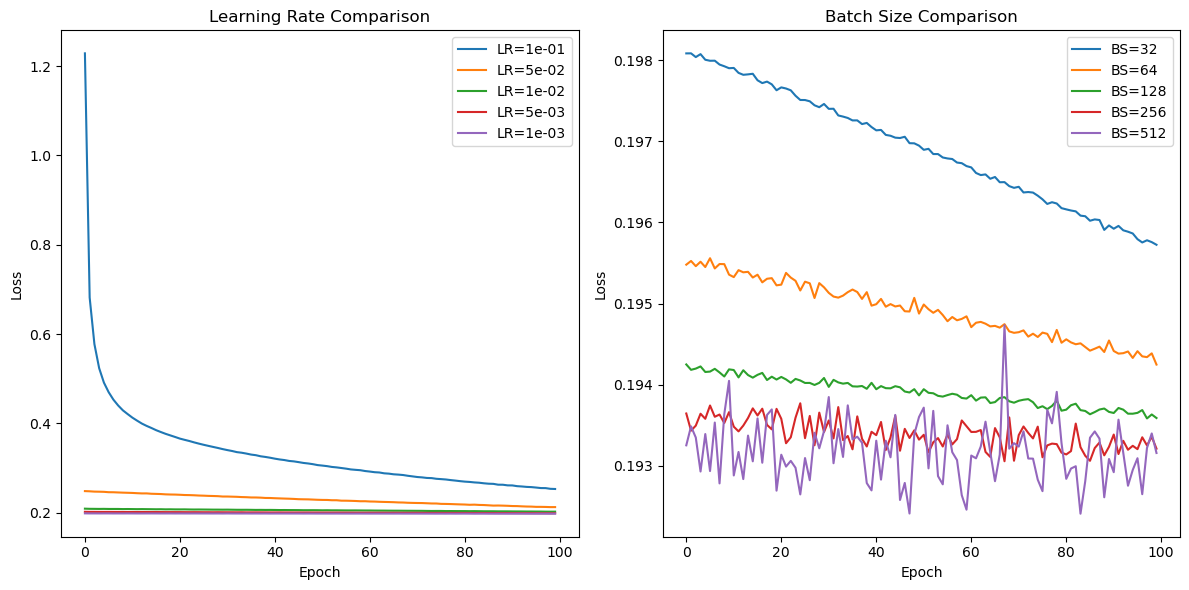

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
# 超参数组合调试
epochs = 100  
results = {}

# 调试不同学习率 (固定batch_size=128)
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]
for lr in learning_rates:
    losses, acc = train_model(lr, 128, epochs)
    results[f'LR={lr:.0e}'] = losses

# 调试不同批次大小 (固定learning_rate=1e-3)
batch_sizes = [32, 64, 128, 256, 512]
for bs in batch_sizes:
    losses, acc = train_model(1e-3, bs, epochs)
    results[f'BS={bs}'] = losses

# 绘制损失曲线
plt.figure(figsize=(12, 6))

# 学习率比较曲线
plt.subplot(1, 2, 1)
for lr in learning_rates:
    label = f'LR={lr:.0e}'
    plt.plot(results[label], label=label)
plt.title('Learning Rate Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 批次大小比较曲线
plt.subplot(1, 2, 2)
for bs in batch_sizes:
    label = f'BS={bs}'
    plt.plot(results[label], label=label)
plt.title('Batch Size Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()